<a href="https://colab.research.google.com/github/Abdelmounim1996/TDA/blob/main/TDA_s%C3%A9ance_I_diagramme_Vrips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD1: Simulations de données et diagramme de persistance

L’Analyse Topologique des Données (TDA) est un domaine récent des mathématiques appliquées, qui cherche à analyser les jeux de données en s’intéressant à leurs ”structures topologiques”. Il vise à comprendre et exploiter la structure topologique et géométrique sous-jacente à des donn ́ees complexes souvent représentées par des nuages de points dans des espaces euclidiens ou des espaces métriques plus généraux. Ainsi grâce à un ensemble de méthodes et d’algorithmes, on arrive à estimer les propriétés topologiques de notre jeu de données. On a choisit de présenter les différents outils et notions mathématiques, principalement emprunter à la topologie algébrique, sur lesquelles repose la TDA.

# Simplex trees and simpicial complexes (Chazal)

TDA typically aims at extracting topological signatures from a point cloud in $\mathbb{R}^d$ or in a general metric space. By studying the topology of a point cloud, we actually mean studying the topology of the unions of balls centered at the point cloud, also called offsets. However, non-discrete sets such as offsets, and also continuous mathematical shapes like curves, surfaces and more generally manifolds, cannot easily be encoded as finite discrete structures. Simplicial complexes are therefore used in computational geometry to approximate such shapes.

A simplicial complex is a set of simplices, they can be seen as higher dimensional generalization of graphs. These are mathematical objects that are both topological and combinatorial, a property making them particularly useful for TDA. The challenge here is to define such structures that are proven to reflect relevant information about the structure of data and that can be effectively constructed and manipulated in practice. 

A filtration is an increasing sequence of sub-complexes of a simplicial complex $\mathcal{K}$. It can be seen as ordering the simplices included in the complex $\mathcal{K}$. Indeed, simpicial complexes often come with a specific order, as for Vietoris-Rips complexes, Cech complexes and alpha complexes.

# Allons-y!

In [ ]:
pip install -U giotto-tda

In [3]:
#Python (>= 3.6)
#NumPy (>= 1.19.1)
#SciPy (>= 1.5.0)
#joblib (>= 0.16.0)
#scikit-learn (>= 0.23.1)
#pyflagser (>= 0.4.1)
#python-igraph (>= 0.8.2)
#plotly (>= 4.8.2)
#ipywidgets (>= 7.5.1)

#pip install jupyterlab

#gtda installer (python -m pip install -U giotto-tda)
import numpy as np
np.random.seed(seed=42)
from gtda.homology import VietorisRipsPersistence
from sklearn.datasets import make_circles

In [4]:
help(VietorisRipsPersistence)

Help on class VietorisRipsPersistence in module gtda.homology.simplicial:

class VietorisRipsPersistence(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, gtda.base.PlotterMixin)
 |  VietorisRipsPersistence(metric='euclidean', metric_params={}, homology_dimensions=(0, 1), collapse_edges=False, coeff=2, max_edge_length=inf, infinity_values=None, reduced_homology=True, n_jobs=None)
 |  
 |  :ref:`Persistence diagrams <persistence_diagram>` resulting from
 |  :ref:`Vietoris–Rips filtrations
 |  <vietoris-rips_complex_and_vietoris-rips_persistence>`.
 |  
 |  Given a :ref:`point cloud <distance_matrices_and_point_clouds>` in
 |  Euclidean space, an abstract :ref:`metric space
 |  <distance_matrices_and_point_clouds>` encoded by a distance matrix, or the
 |  adjacency matrix of a weighted undirected graph, information about the
 |  appearance and disappearance of topological features (technically,
 |  :ref:`homology classes <homology_and_cohomology>`) of various dimensions
 |  and 

In [5]:
#Cercle avec bruit Gaussien (en faisant varier la variance du bruit)
X = np.asarray([
    make_circles(60, noise=np.random.random(), factor=np.random.random())[0]
    for i in range(10)
])

In [6]:
# Diagrammes de Persistence pour la filtration de V-Rips 
from gtda.plotting import plot_point_cloud
i = 0
plot_point_cloud(X[i])

In [7]:
# Initialize the Vietoris–Rips transformer
VR = VietorisRipsPersistence(homology_dimensions=[0,1,2])

In [8]:
# Create n_samples point clouds of n_points points
n_samples = 10
n_points = 60
point_clouds = np.random.random((n_samples, n_points, 2))

# Compute persistence diagrams of all point clouds
diags = VR.fit_transform(point_clouds)

In [9]:
from gtda.plotting import plot_point_cloud
plot_point_cloud(point_clouds[9])

In [10]:
diags.shape

(10, 76, 3)

In [11]:
VR.plot(diags, sample=0)

In [12]:
diags2 = VR.fit_transform(X)

In [13]:
VR.plot(diags2, sample=9)

In [14]:
point_clouds

array([[[0.59822529, 0.73566311],
        [0.99834751, 0.93311333],
        [0.6425652 , 0.42124805],
        ...,
        [0.20136378, 0.25862083],
        [0.16470635, 0.33021506],
        [0.75675151, 0.51938586]],

       [[0.20488127, 0.87783008],
        [0.87958185, 0.87057843],
        [0.23879621, 0.45123934],
        ...,
        [0.87120448, 0.76606478],
        [0.78844734, 0.6649849 ],
        [0.26028686, 0.90719503]],

       [[0.67073231, 0.56044063],
        [0.11098947, 0.44705554],
        [0.46035827, 0.86456361],
        ...,
        [0.08709277, 0.61706652],
        [0.11383839, 0.34522314],
        [0.50741194, 0.87422252]],

       ...,

       [[0.56953978, 0.25954178],
        [0.43699589, 0.59356094],
        [0.07308156, 0.62234326],
        ...,
        [0.97307816, 0.22612533],
        [0.30419872, 0.30394251],
        [0.23041666, 0.00147382]],

       [[0.72934479, 0.9668455 ],
        [0.22429348, 0.66304719],
        [0.74189633, 0.84842538],
        .

In [15]:
Xwn = np.asarray([
    make_circles(100, factor=np.random.random())[0]
    for i in range(10)
])

In [16]:
# Diagrammes de Persistence pour la filtration de V-Rips 
from gtda.plotting import plot_point_cloud
i = 0
plot_point_cloud(Xwn[0])

In [17]:
diagsXwn = VR.fit_transform(Xwn)

In [18]:
VR.plot(diagsXwn, sample=0)

In [19]:
#2d-3d exemple
X2, y = make_circles(factor=0.5, random_state=0, noise=0.05)

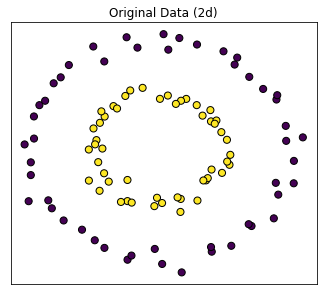

In [20]:
import matplotlib.pyplot as plt
# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X2[:, 0], X2[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [21]:
#if X is a single point cloud ~ a single 3D array
diags3d=VR.fit_transform(X2[None,:,:])
VR.plot(diags3d, sample=0)

In [22]:
#if X list of 2D arrays
diags2d=VR.fit_transform(X2.reshape(1,*X2.shape))
VR.plot(diags2d, sample=0)

# Diagramme de persistence pas à pas

rips_G = gd.RipsComplex(distance_matrix = G , max_edge_length = 1.1)
simplex_tree_G = rips_G.create_simplex_tree(max_dimension =2)
diag_G = np.array(simplex_tree_G.persistence())



#Diagramme de persistence en dimension i:
 def diagm_n(M,i):  
    shape = M.shape
    n_1 = (M==1).sum()
    D = []
    if i == 1:
        D = M[0:n_1,]
        condition = D != 1
        D = np.extract(condition,D)
    if i == 0:
        D = M[n_1 + 2:shape[0]-1,]
        condition = D != 0
        D = np.extract(condition,D)   
    return D 

 diag_G_1 = diagm_n(diag_G,1)
 

Automatically created module for IPython interactive environment


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=5 in 2.7 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=30 in 1.5 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=50 in 11 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=100 in 2.1 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=5 in 1.1 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=30 in 1.5 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=50 in 1.7 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=100 in 3.2 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=5 in 1.1 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=30 in 1.5 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=50 in 1.5 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=100 in 1.8 sec


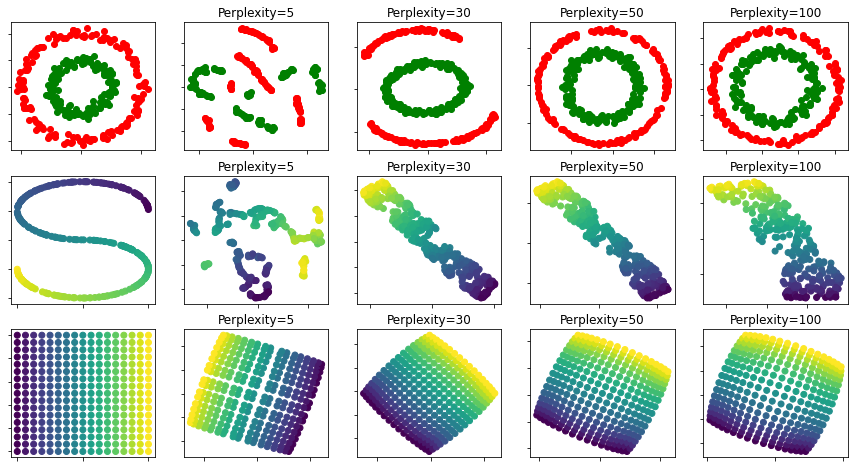

In [23]:
# Author: Narine Kokhlikyan <narine@slice.com>

# License: BSD

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

diags2c=VR.fit_transform(X.reshape(1,*X.shape))

diags2cp=list()
for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    diags2cp.append(VR.fit_transform(Y.reshape(1,*Y.shape)))
    
#T-distributed Stochastic Neighbor Embedding.

#t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to 
#joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of 
#the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. 
#with different initializations we can get different results. 

#The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. 
#Larger datasets usually require a larger perplexity.

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

diagsSv=VR.fit_transform(X.reshape(1,*X.shape))

diagsSvp=list()
for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    diagsSvp.append(VR.fit_transform(Y.reshape(1,*Y.shape)))


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

diagsC2D=VR.fit_transform(X.reshape(1,*X.shape))

diagsC2Dp=list()
for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    diagsC2Dp.append(VR.fit_transform(Y.reshape(1,*Y.shape)))


plt.show()

In [24]:
VR.plot(diags2c)

In [25]:
VR.plot(diags2cp[0])

In [26]:
VR.plot(diags2cp[1])

In [27]:
VR.plot(diags2cp[2])

In [28]:
VR.plot(diags2cp[3])

In [29]:
VR.plot(diagsSv)

In [30]:
VR.plot(diagsSvp[0])

In [31]:
VR.plot(diagsSvp[3])

In [32]:
#pour voir ce qu'un truc contractible va donner
VR.plot(diagsC2D)

In [33]:
#Ca vous permet de voir ce que donne un truc sans structure topologique remarquable
VR.plot(diagsC2Dp[0])

In [34]:
VR.plot(diagsC2Dp[3])

In [35]:
def circleUnif(n=30, radius=1, sigma=0, center=(0, 0)):
    radii = np.random.randn(n) * sigma + radius
    angles = np.random.rand(n) * np.pi * 2

    x = radii * np.cos(angles)
    y = radii * np.sin(angles)

    return np.transpose([x, y]) + center

In [36]:
#import pandas as pd
Circle1 = circleUnif(60, 1, 0, (0,0))
Circle2 = circleUnif(60, 2, 0, (3,3))

Circles = np.concatenate([Circle1, Circle2], axis=0)

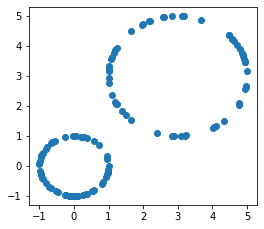

In [37]:
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(221)
ax.scatter(Circles[:,0], Circles[:,1])
#ax.scatter(Circles[1,:], Circles[1,:])
plt.show()

In [38]:
diags2Cir=VR.fit_transform(Circles.reshape(1,*Circles.shape))
VR.plot(diags2Cir)

In [39]:
diags2Cir

array([[[0.00000000e+00, 2.22702604e-03, 0.00000000e+00],
        [0.00000000e+00, 2.55276822e-03, 0.00000000e+00],
        [0.00000000e+00, 3.16537614e-03, 0.00000000e+00],
        [0.00000000e+00, 5.82156237e-03, 0.00000000e+00],
        [0.00000000e+00, 7.74478633e-03, 0.00000000e+00],
        [0.00000000e+00, 1.01179406e-02, 0.00000000e+00],
        [0.00000000e+00, 1.17712002e-02, 0.00000000e+00],
        [0.00000000e+00, 1.17748464e-02, 0.00000000e+00],
        [0.00000000e+00, 1.20362947e-02, 0.00000000e+00],
        [0.00000000e+00, 1.55566148e-02, 0.00000000e+00],
        [0.00000000e+00, 1.86075270e-02, 0.00000000e+00],
        [0.00000000e+00, 1.90995838e-02, 0.00000000e+00],
        [0.00000000e+00, 1.96921397e-02, 0.00000000e+00],
        [0.00000000e+00, 2.15642620e-02, 0.00000000e+00],
        [0.00000000e+00, 2.27692500e-02, 0.00000000e+00],
        [0.00000000e+00, 2.70324033e-02, 0.00000000e+00],
        [0.00000000e+00, 2.77450252e-02, 0.00000000e+00],
        [0.000

In [40]:
#VR01 = VietorisRipsPersistence(homology_dimensions=[0,1])
#diags2Cir01=VR01.fit_transform(Circles.reshape(1,*Circles.shape))
VR.plot(diags2Cir, homology_dimensions=[0,1])

In [41]:
help(VR.fit_transform)

Help on method fit_transform in module sklearn.base:

fit_transform(X, y=None, **fit_params) method of gtda.homology.simplicial.VietorisRipsPersistence instance
    Fit to data, then transform it.
    
    Fits transformer to ``X`` and ``y`` with optional parameters ``fit_params``
    and returns a transformed version of ``X``.
    
    Parameters
    ----------
    X : ndarray or list of length n_samples
        Input data representing a collection of point clouds if `metric`
        was not set to ``"precomputed"``, and of distance matrices or
        adjacency matrices of weighted undirected graphs otherwise. Can be
        either a 3D ndarray whose zeroth dimension has size ``n_samples``,
        or a list containing ``n_samples`` 2D ndarrays/sparse matrices.
        Point cloud arrays have shape ``(n_points, n_dimensions)``, and if
        `X` is a list these shapes can vary between point clouds. If
        `metric` was set to ``"precomputed"``, then:
    
            - Diagonal e

In [42]:
help(VR.plot)

Help on function plot in module gtda.homology.simplicial:

plot(Xt, sample=0, homology_dimensions=None, plotly_params=None)
    Plot a sample from a collection of persistence diagrams, with
    homology in multiple dimensions.
    
    Parameters
    ----------
    Xt : ndarray of shape (n_samples, n_features, 3)
        Collection of persistence diagrams, such as returned by
        :meth:`transform`.
    
    sample : int, optional, default: ``0``
        Index of the sample in `Xt` to be plotted.
    
    homology_dimensions : list, tuple or None, optional, default: ``None``
        Which homology dimensions to include in the plot. ``None`` means
        plotting all dimensions present in ``Xt[sample]``.
    
    plotly_params : dict or None, optional, default: ``None``
        Custom parameters to configure the plotly figure. Allowed keys are
        ``"traces"`` and ``"layout"``, and the corresponding values should
        be dictionaries containing keyword arguments as would be f

In [43]:
#import pandas as pd
Circle3 = circleUnif(60, 1, 0.05, (0,0))
Circle4 = circleUnif(60, 2, 0.03, (3,3))

Circles2 = np.concatenate([Circle3, Circle4], axis=0)

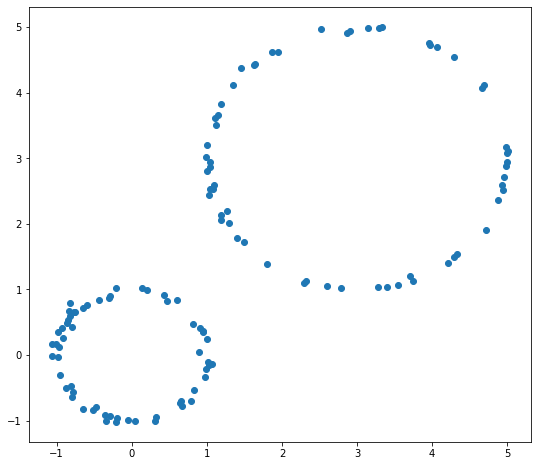

In [44]:
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot()
ax.scatter(Circles2[:,0], Circles2[:,1])
#ax.scatter(Circles[1,:], Circles[1,:])
plt.show()

In [45]:
diags2Cir2=VR.fit_transform(Circles2.reshape(1,*Circles2.shape))
VR.plot(diags2Cir2)

# Nuage de points tirés de façon uniforme dans le cube unité (pour voir ce qu'un truc contractible va donner)

In [46]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

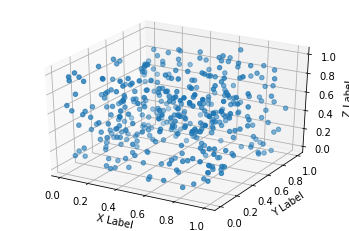

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Another example using a 3D uniform grid
n_samples = 400 # Vérifier ce qu'est passe au augmenter le nombre de samples!
xs = randrange(n_samples, 0, 1)
ys = randrange(n_samples, 0, 1)
zs = randrange(n_samples, 0, 1)

ax.scatter(xs, ys, zs)
#ax.scatter(xx, yy, zz)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [48]:
#voir ce que donne un truc sans structure topologique remarquable
XCU = np.array((xs,ys,zs))
diags3Dcub=VR.fit_transform(XCU.reshape(1,*XCU.shape))
VR.plot(diags3Dcub)

# On reprend les premiers exemples en mettant un outlier (un point très loin des cercles) et on refait les diagrammes

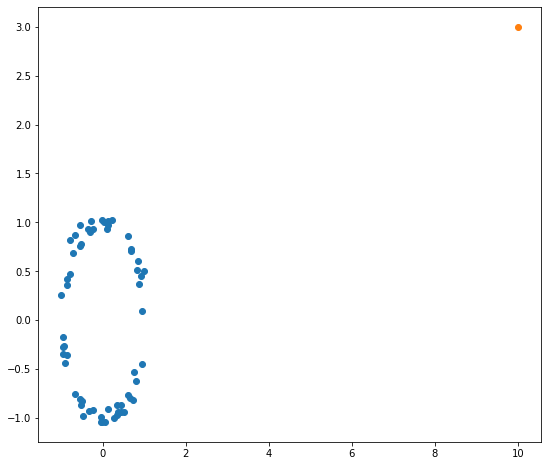

In [49]:
Circleout = circleUnif(60, 1, 0.05, (0,0))
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot()
ax.scatter(Circleout[:,0], Circleout[:,1])
ax.scatter(10,3)
#ax.scatter(Circles[1,:], Circles[1,:])
plt.show()

In [50]:
#Circleout est un ndarray, donc...
Circleoutp = np.insert(Circleout, 60, 3, axis=0)

In [51]:
diagscircleout = VR.fit_transform(Circleout.reshape(1,*Circleout.shape))
VR.plot(diagscircleout)


In [52]:
diagscircleoutp = VR.fit_transform(Circleoutp.reshape(1,*Circleoutp.shape))
VR.plot(diagscircleoutp)

# Cela nous permet de signaler la sensibilité des méthodes de TDA aux outliers

# On peut alors parler de la DTM (distance to a measure) pour gérer ce genre de problème

Despite strong stability properties, the persistent homology of filtrations
classically used in Topological Data Analysis, such as, e.g. the Cech or Vietoris-Rips ˇ
filtrations, are very sensitive to the presence of outliers in the data from which they
are computed. In this paper, we introduce and study a new family of filtrations, the
DTM-filtrations, built on top of point clouds in the Euclidean space which are more
robust to noise and outliers. The approach adopted in this work relies on the notion of
distance-to-measure functions, and extends some previous work on the approximation
of such functions. 

Anai et al., 2020. Arxiv.   Regardez la page 12!

The function dtm computes the "distance to measure function" on a set of points Grid, using the uniform empirical measure on a set of points $X$. Given a probability measure $P$, The distance to measure function, for each y in $R^d$, is defined by

$$d_{m_{0}}(y) = (1/m_{0} \int_{0}^{m_{0}}G_y^{-1}(u))^{r} du)^{1/r},$$ 

where $G_y(t) = P(||X-y|| ≤ t)$, and m0 in (0,1) and r in $[1,\infty)$ are tuning parameters. As $m_{0}$ increases, DTM function becomes smoother, so m0 can be understood as a smoothing parameter. $r$ affects less but also changes DTM function as well. The DTM can be seen as a smoothed version of the distance function. See Details and References.

Given $X={x_1, …, x_n}$, the empirical version of the distance to measure is

$\hat d_{m_{0}}(y) = (1/k ∑_{x_i \in N_k(y)} ||x_i-y||^r)^{1/r}$,

where $k= \lceil m_{0} * n \rceil$ and $N_k(y)$ is the set containing the k nearest neighbors of y among $x_1, …, x_n$.

In [55]:
!git clone https://github.com/GUDHI/TDA-tutorial

Cloning into 'TDA-tutorial'...
remote: Enumerating objects: 802, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 802 (delta 62), reused 89 (delta 32), pack-reused 660
Receiving objects: 100% (802/802), 37.52 MiB | 17.19 MiB/s, done.
Resolving deltas: 100% (371/371), done.
Checking out files: 100% (63/63), done.


In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install gudhi

In [70]:
import os
import sys
#from torchvision import datasets, transforms
sys.path.append("/content/TDA-tutorial/utils")

In [71]:
import DTM_filtrations

In [72]:
def DTM(X,query_pts,m):
    '''
    Compute the values of the DTM (with exponent p=2) of the empirical measure of a point cloud X
    Require sklearn.neighbors.KDTree to search nearest neighbors
    
    Input:
    X: a nxd numpy array representing n points in R^d
    query_pts:  a kxd numpy array of query points
    m: parameter of the DTM in [0,1)
    
    Output: 
    DTM_result: a kx1 numpy array contaning the DTM of the 
    query points
    
    Example:
    X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    Q = np.array([[0,0],[5,5]])
    DTM_values = DTM(X, Q, 0.3)
    '''
    N_tot = X.shape[0]     
    k = math.floor(m*N_tot)+1   # number of neighbors

    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    NN_Dist, NN = kdt.query(query_pts, k, return_distance=True)  

    DTM_result = np.sqrt(np.sum(NN_Dist*NN_Dist,axis=1) / k)
    
    return(DTM_result)

Text(0.5, 1.0, 'Values of the DTM on X with parameter m=0.1')

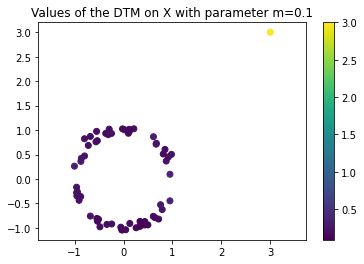

In [75]:
import math
from sklearn.neighbors import KDTree
' Compute the DTM on X ' 
# compute the values of the DTM of parameter m
m = 0.1                            
DTM_values = DTM(Circleoutp,Circleoutp,m)             

# plot of the DTM
plot=plt.scatter(Circleoutp[:,0], Circleoutp[:,1], c=DTM_values)
plt.colorbar(plot)
plt.axis('equal')
plt.title('Values of the DTM on X with parameter m='+str(m))

diagram_DTM = np.array([[[(1, (0.4657536838075277, 1.0024982298140144)), (0, (0.08689166599995744, 10)), (0, (0.1100131089211926, 0.4648055582169441)), (0, (0.10219403011264977, 0.4013120717678243)), (0, (0.15233887734354606, 0.40973870052054234)), (0, (3.0439748442181305, 3.2470399367862335)), (0, (0.15817080661358887, 0.34861804679673225)), (0, (0.18115297786260023, 0.34642849764867)), (0, (0.16141543138783054, 0.24598507336511782)), (0, (0.3660172214303413, 0.45019705952099776)), (0, (0.25937088773712813, 0.3391050229823814)), (0, (0.21712903859580843, 0.2944693674527818)), (0, (0.2731986653505711, 0.34464071672791996)), (0, (0.36293535353656226, 0.4337735619116246)), (0, (0.2708484588062338, 0.34156500141407364)), (0, (0.24928338630378155, 0.315974307153073)), (0, (0.28213960905607643, 0.3472635224208255)), (0, (0.22278225260794654, 0.2817458348010035)), (0, (0.207750155534581, 0.26076840937082807)), (0, (0.23412674540274328, 0.28048340776583386)), (0, (0.30196550365748, 0.34791815498256456)), (0, (0.22648841472499015, 0.2701754892325565)), (0, (0.24559606334888542, 0.289239774023917)), (0, (0.19849272536389018, 0.24194114297098826)), (0, (0.14153276212071084, 0.18410383018839793)), (0, (0.2256515805391782, 0.2681611449038641)), (0, (0.10605601486419472, 0.1475399507034746)), (0, (0.1910859222158442, 0.23217999473743536)), (0, (0.19739988138128103, 0.2359291881902748)), (0, (0.19627619230794616, 0.23325229423611651)), (0, (0.2135772913296335, 0.25050073039597137)), (0, (0.16993262136524134, 0.20685008743205777)), (0, (0.21359829163974148, 0.24918011133293996)), (0, (0.11876778439207787, 0.15313892041278196)), (0, (0.24428566251139733, 0.2782396233754789)), (0, (0.13200303785773498, 0.16373501591752398)), (0, (0.16232647926399696, 0.19251246250480855)), (0, (0.1141453905620261, 0.14409180694845405)), (0, (0.18948303236368072, 0.21929338877557525)), (0, (0.1501570565465396, 0.17863285257346972)), (0, (0.16390320034372927, 0.19185722398919475)), (0, (0.1891744603397447, 0.2168293894309377)), (0, (0.11306888491710469, 0.1407000517315046)), (0, (0.11760052027170241, 0.1436126517704651)), (0, (0.11669302747214638, 0.14102972570530992)), (0, (0.28232458145630746, 0.3064027745042311)), (0, (0.23342426543719574, 0.25665884440858117)), (0, (0.1723038008751532, 0.19196437192824034)), (0, (0.16655307670988903, 0.1858913935294129)), (0, (0.2717395048035599, 0.2897420652309761)), (0, (0.223442226577824, 0.24074574391012543)), (0, (0.2803334150012876, 0.29602650661088764)), (0, (0.11053626011550491, 0.12433389387429922)), (0, (0.15665345553837684, 0.17006695993244267)), (0, (0.12116930897971762, 0.13429363454300547)), (0, (0.14225325870709846, 0.15516759352036447)), (0, (0.20569979254912496, 0.21762967909472852)), (0, (0.1419207872063111, 0.15105542518478027)), (0, (0.20505775240939791, 0.21366147108202357)), (0, (0.08933968022042486, 0.09790710655858528)), (0, (0.13907838613918017, 0.14534359024322324)), (0, (0.1159812604461532, 0.11731665408399795))]]])

In [76]:
 def SampleOnCircle(N_obs = 100, N_out = 0, is_plot = False):
    '''
    Sample N_obs points (observations) points from the uniform distribution on the unit circle in R^2, 
        and N_out points (outliers) from the uniform distribution on the unit square  
        
    Input: 
    N_obs: number of sample points on the circle
    N_noise: number of sample points on the square
    is_plot = True or False : draw a plot of the sampled points            
    
    Output : 
    data : a (N_obs + N_out)x2 matrix, the sampled points concatenated 
    '''
    rand_uniform = np.random.rand(N_obs)*2-1    
    X_obs = np.cos(2*np.pi*rand_uniform)
    Y_obs = np.sin(2*np.pi*rand_uniform)

    X_out = np.random.rand(N_out)*2-1
    Y_out = np.random.rand(N_out)*2-1

    X = np.concatenate((X_obs, X_out))
    Y = np.concatenate((Y_obs, Y_out))
    data = np.stack((X,Y)).transpose()

    if is_plot:
        fig, ax = plt.subplots()
        plt_obs = ax.scatter(X_obs, Y_obs, c='tab:cyan');
        plt_out = ax.scatter(X_out, Y_out, c='tab:orange');
        ax.axis('equal')
        ax.set_title(str(N_obs)+'-sampling of the unit circle with '+str(N_out)+' outliers')
        ax.legend((plt_obs, plt_out), ('data', 'outliers'), loc='lower left')
    return data

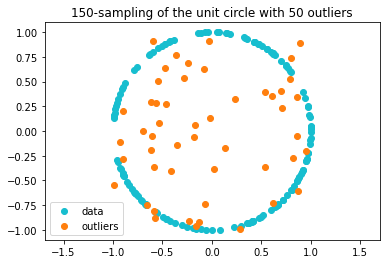

In [77]:
' Sampling on the circle with outlier '
N_obs = 150                                     # number of points sampled on the circle
N_out = 50                                      # number of outliers 
X = SampleOnCircle(N_obs, N_out, is_plot=True)  # sample points with outliers

In [78]:
diagsSamp = VR.fit_transform(X.reshape(1,*X.shape))
VR.plot(diagsSamp)
#'Persistence diagram of the Rips complex'
#1-homology feature of the circle does not appear clearly here ($\beta_1 = 1$)

Text(0.5, 1.0, 'Values of the DTM on X with parameter m=0.1')

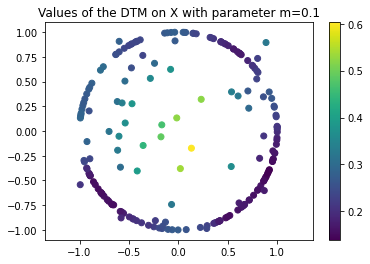

In [79]:
' Compute the DTM on X ' 
# compute the values of the DTM of parameter m
m = 0.1                            
DTM_values = DTM(X,X,m)             

# plot of the DTM
plot=plt.scatter(X[:,0], X[:,1], c=DTM_values)
plt.colorbar(plot)
plt.axis('equal')
plt.title('Values of the DTM on X with parameter m='+str(m))